In [1]:

from sklearn.base import TransformerMixin, BaseEstimator

from collections import Counter , defaultdict

import pandas as pd

pd.set_option('display.max_columns', None)


from pandas import Series as s , DataFrame as df
import numpy as np

import seaborn as sns
# import matplotlib.pyplot as plt

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt, rcParams as rc


%matplotlib inline
rc["figure.figsize"] = 10,6

import datetime
import datetime as dt

from sklearn.model_selection  import StratifiedKFold
from sklearn.decomposition import PCA

from iteration_utilities import duplicates, unique_everseen

import sys
from itertools import groupby
from operator import itemgetter
from timeit import timeit


## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler # over sampling method 2

In [2]:

#Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.naive_bayes import MultinomialNB

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler, normalize



from sklearn.model_selection import train_test_split

import lightgbm as lgb


#Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_recall_fscore_support

from sklearn.pipeline import Pipeline

# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer

In [ ]:
"train"

In [5]:
df = pd.read_csv("train.csv")

df_test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission_lfbv3c3.csv")

df10 = df.copy()
df.shape, df_test.shape, submission.shape

((318438, 18), (137057, 17), (137057, 2))

In [6]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [7]:
def get_percentage_miss_value(dataset):
    higher_miss_value_column = []
    miss_threshold_value = 50
    
    for i in dataset.columns:
        if dataset[i].isna().sum() > 1: 
            perectange_val = (dataset[i].isna().sum() / len(dataset)) * 100
            print("Column-> " , i, ", total no of missing value : ",dataset[i].isna().sum() , " & :         ", round(perectange_val,2) ," %")
                
            if(perectange_val > miss_threshold_value):
                higher_miss_value_column.append(i)
            
    print("\n\n\n")
    
    if higher_miss_value_column:
        print("Higher Missing values in Columns for Delete : ", higher_miss_value_column)
    else:
        print("There are no Higher Column Missing values in Dataset")

In [8]:
get_percentage_miss_value(df)

Column->  Bed Grade , total no of missing value :  113  & :          0.04  %
Column->  City_Code_Patient , total no of missing value :  4532  & :          1.42  %




There are no Higher Column Missing values in Dataset


In [9]:
# get_percentage_miss_value(df_test)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [11]:
def check_cloumn_details_type_numberical(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "int"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")
            
            
def check_cloumn_details_type_float(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "float"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")
            

In [12]:
def get_categorical_col_name_df(dataset): #testing has been pending
    return dataset.select_dtypes(include=['object']) #get all categorical columns only

In [13]:
get_categorical_col_name_df(df).isna().sum()

Hospital_type_code      0
Hospital_region_code    0
Department              0
Ward_Type               0
Ward_Facility_Code      0
Type of Admission       0
Severity of Illness     0
Age                     0
Stay                    0
dtype: int64

In [14]:
get_categorical_col_name_df(df).columns.to_list()

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'Stay']

In [15]:
# check_cloumn_details_type_numberical(df)

In [16]:
# check_cloumn_details_type_float(df)

In [17]:
def visualize_histogram(dataset):
    # plot histogram
    plt.figure(figsize=(25, 9))  # figure size in ratio 16:9
    features = dataset.columns  # list of columns name
    for i, j in enumerate(features):
        plt.subplot(3, 3, i + 1)  # create subplot for histogram
        plt.title("Histogram of {}".format(j), fontsize=15)  # title of histogram

        bins = len(dataset[j].unique())  # bins for histogram
        plt.hist(dataset[j], bins=bins, rwidth=0.8, edgecolor="y", linewidth=2, )  # plot histogram

    plt.subplots_adjust(hspace=0.5)  # space between horixontal axes (subplots)

In [18]:
# visualize_histogram(df)

In [19]:
# corr_2_more_visualize(df)

In [20]:


# visualize_numberical_values(df)

In [21]:
#Label encoding
def convert_to_numerical_label_encoding(dataset):
    enc = LabelEncoder()
    for i in dataset.columns:
        if(dataset[i].dtype == "object"):
            dataset[i] = enc.fit_transform(dataset[i])
            
    return dataset

In [31]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0] if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    


In [32]:
def majority_imbalanced_dataset(dataset, target_col):
    feature_columns = dataset.columns.tolist()
    feature_columns = [c for c in feature_columns if c not in [target_col]]

    X2_new = dataset[feature_columns]
    Y2_new = dataset[target_col]

    os =  RandomOverSampler(random_state=35)
    X_feature_variables , y_output = os.fit_sample(X2_new, Y2_new)
    
    X_feature_variables[target_col] = y_output
    
    X_feature_variables = X_feature_variables.sample(frac = 1).reset_index(drop = True)
    
    return X_feature_variables

In [33]:
def standardscaler_preprocessing(dataset_train, dataset_test, num_col):
    scaler = StandardScaler()
   
    dataset_train[num_col] = scaler.fit_transform(dataset_train[num_col])

    dataset_test[num_col] = scaler.transform(dataset_test[num_col])
    
    return dataset_train, dataset_test

In [34]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [35]:
# Counter(df.Segmentation)

In [36]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


# <font color ='green' > EDA

In [37]:
# drop_col = ["Trip_ID" , "Var1", "Var2", "Var3"]

drop_col = ["case_id"]

In [38]:
df1 = df.drop(columns = drop_col)
df.shape , df1.shape

((318438, 18), (318438, 17))

In [39]:
df1_test = df_test.drop(columns = drop_col)
df_test.shape , df1_test.shape

((137057, 17), (137057, 16))

In [40]:
# df1["Type_of_Cab"] = df1["Type_of_Cab"].fillna("Unkown")
# df1["Confidence_Life_Style_Index"] = df1["Confidence_Life_Style_Index"].fillna("Unkown")

In [41]:
df2 = DataFrameImputer().fit_transform(df1.copy())


df2_test = DataFrameImputer().fit_transform(df1_test.copy())

In [42]:
df2.isna().sum().sum(), df2_test.isna().sum().sum()

(0, 0)

In [43]:
df3 = convert_to_numerical_label_encoding(df2.copy())
df2.shape, df3.shape

((318438, 17), (318438, 17))

In [44]:
df2.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [45]:
df3.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911.0,0
1,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954.0,4
2,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745.0,3
3,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272.0,4
4,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558.0,4


In [46]:
df3_test = convert_to_numerical_label_encoding(df2_test.copy())
df2_test.shape, df3_test.shape

((137057, 16), (137057, 16))

In [47]:
Counter(df3.Stay)

Counter({0: 23604,
         4: 11743,
         3: 55159,
         1: 78139,
         5: 35018,
         2: 87491,
         7: 10254,
         10: 6683,
         8: 4838,
         6: 2744,
         9: 2765})

In [48]:

# df3 = majority_imbalanced_dataset(df3.copy(), "Surge_Pricing_Type")
# Counter(df4.Surge_Pricing_Type)

In [49]:
df3.shape

(318438, 17)

In [50]:
# scaling_col = ["Trip_Distance" , "Customer_Since_Months" , "Life_Style_Index", "Customer_Rating", "Var2", "Var3"]

# scaling_col = ["Trip_Distance" , "Customer_Since_Months" , "Life_Style_Index", "Customer_Rating"]



# df4, df4_test = standardscaler_preprocessing(df3.copy(), df3_test.copy(), scaling_col)

In [51]:
df3.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911.0,0
1,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954.0,4
2,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745.0,3
3,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272.0,4
4,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558.0,4


In [52]:
df3.describe()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000
mean,18.318841,1.256841,4.771717,0.778098,3.197627,1.943779,1.888575,3.286913,2.625807,65747.579472,7.251859,0.782768,1.374076,3.284099,4.127777,4880.749392,2.698550
std,8.633755,1.535712,3.102535,0.752527,1.168171,0.561245,0.804655,1.688050,0.872991,37979.936440,4.711377,0.688957,0.768377,1.764061,1.889567,1086.776254,2.150075
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1800.000000,0.000000
25%,11.000000,0.000000,2.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,32847.000000,4.000000,0.000000,1.000000,2.000000,3.000000,4186.000000,1.000000
50%,19.000000,1.000000,5.000000,1.000000,3.000000,2.000000,2.000000,4.000000,3.000000,65724.500000,8.000000,1.000000,2.000000,3.000000,4.000000,4741.000000,2.000000
75%,26.000000,2.000000,7.000000,1.000000,4.000000,2.000000,2.000000,5.000000,3.000000,98470.000000,8.000000,1.000000,2.000000,4.000000,5.000000,5409.000000,3.000000
max,32.000000,6.000000,13.000000,2.000000,24.000000,4.000000,5.000000,5.000000,4.000000,131624.000000,38.000000,2.000000,2.000000,32.000000,9.000000,11008.000000,10.000000


In [54]:
df3.head(4)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911.0,0
1,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954.0,4
2,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745.0,3
3,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272.0,4


In [55]:
scaling_col = ["Admission_Deposit" ]



df4, df4_test = standardscaler_preprocessing(df3.copy(), df3_test.copy(), scaling_col)

In [56]:
df4.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,0.027835,0
1,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,0.987556,4
2,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,-0.124910,3
3,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,2.200319,4
4,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,0.623175,4


In [57]:
X = df4.iloc[:,:-1]

Y = df4.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 100)

In [58]:
df4_test.head(2)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,21,2,3,2,3,2,3,0,2.0,17006,2.0,0,2,2,7,-1.643165
1,29,0,4,0,2,2,3,5,2.0,17006,2.0,1,2,4,7,-0.793862


In [60]:
# model_logistic = LogisticRegression()
# model_logistic.fit(X, Y)
# y_pred_final = model_xgb.predict(df3_test)


# model_xgb = XGBClassifier(max_depth=5, objective='multi:softmax', num_classes=10)
# model_xgb.fit(X, Y)
# y_pred_final = model_xgb.predict(df3_test)


# lgbclf= LGBMClassifier(gamma= 0.5, learning_rate= 0.05,max_depth= 10, n_estimators= 100)
model_lgb= LGBMClassifier(n_estimators= 200, objective='multi:softmax', num_classes=10)
model_lgb.fit(X,Y)
# y_pred_final = model_lgb.predict(df3_test)



# model_catg= CatBoostClassifier(depth= 3,l2_leaf_reg= 1e-25,learning_rate= 0.07,loss_function= 'MultiClass',n_estimators= 200)
# model_catg.fit(X,Y)
# y_pred_final = model_catg.predict(df3_test)


LGBMClassifier(n_estimators=200, num_classes=10, objective='multi:softmax')

In [157]:
# len(submission), len(df3_test)

In [69]:
create_submission_file(model_lgb , "lgbm_1", df3_test)

'File created successful'

In [62]:
# y_pred_final = model_catg.predict(df3_test)
# get_accuracy(y_pred_final , X)

In [66]:
def get_accuracy(y_train_val , y_pred_val , dataset_type = "Default"):
    
    print(" Dataset type is : ", dataset_type)
    
    print("\n Accuracy Score     : ",round(accuracy_score(y_train_val, y_pred_val), 4) * 100)
    
#     print("\n precision_accuracy : ",round(precision_score(y_train_val, y_pred_val), 4) * 100)
 
#     print("\n recall_accuracy    : ",round(recall_score(y_train_val, y_pred_val), 4) * 100)
    
#     print("\n roc_auc_accuracy   : ",round(roc_auc_score(y_train_val, y_pred_val), 4) * 100)
    
#     print("\n f1_score_accuracy  : ",round(f1_score(y_train_val, y_pred_val), 4) * 100)
    
#     print("\n explained_variance  : ",round(explained_variance_score(y_train_val, y_pred_val), 4) * 100)
    
#     tn, fp, fn, tp = confusion_matrix(y_train_val, y_pred_val).ravel()
    
#     print("\n Confusion Matrix TN : ", tn, " FP : ", fp, " FN : ", fn, " TP : ", tp)
    print(confusion_matrix(y_train_val, y_pred_val))

In [67]:
submission.head()

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10


In [68]:
def create_submission_file(model, file_name, test_data):
    
    y_pred_final = model.predict(test_data)

    submission_1 = submission.copy()
    submission_1["Stay"] = y_pred_final
    submission_1.to_csv(file_name+'.csv', index=False)
    
    return "File created successful"

In [99]:
%%time


lr_clf = LogisticRegression(multi_class='multinomial')
scores = cross_val_score(lr_clf, X, Y, cv=5, scoring=make_scorer(f1_score, average='weighted'), n_jobs=-1)
print('F1_score for LogReg : ', scores.mean())

F1_score for LogReg :  0.4573757935844253
CPU times: user 48.9 ms, sys: 36.6 ms, total: 85.6 ms
Wall time: 1.72 s


In [108]:
%%time

GBC_d = GradientBoostingClassifier()
GBC_d.fit(X_train,y_train)
pred_gbc = GBC_d.predict(X_test)
print(accuracy_score(y_test,pred_gbc))
print(classification_report(y_test,pred_gbc))

0.533457249070632
              precision    recall  f1-score   support

           0       0.43      0.45      0.44       402
           1       0.39      0.33      0.35       365
           2       0.63      0.60      0.61       382
           3       0.64      0.71      0.67       465

    accuracy                           0.53      1614
   macro avg       0.52      0.52      0.52      1614
weighted avg       0.53      0.53      0.53      1614

CPU times: user 2.08 s, sys: 1.35 ms, total: 2.08 s
Wall time: 2.08 s


In [110]:
create_submission_file(GBC_d , "gbc_1", df3_test)

'File created successful'

In [113]:
Counter(submission.Segmentation)

Counter({'A': 2627})

In [189]:
rows=[]

def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.02 , random_state = i)
            
            model.fit(x_train,y_train)
            
            y_pred_train = model.predict(x_train)
            y_pred = model.predict(x_test)
            
            train_acc = accuracy_score(y_train, y_pred_train)
            train_acc = round(train_acc, 4) * 100
            
            test_acc = accuracy_score(y_test, y_pred)
            test_acc = round(test_acc, 4) * 100
            
#             roc_auc_score_acc = roc_auc_score(y_test, y_pred)
#             roc_auc_score_acc = round(roc_auc_score_acc, 4) * 100
            
            row = [names[j],   i,   train_acc, test_acc]
        
    
            rows.append(row)
            
    models_df = pd.DataFrame(rows) 
    
    models_df.columns = columns_name
    print(models_df)
    
    


In [190]:
names = [ "LightGBM", "RF", "XGBoost" , "Logistic"]

algorithms = [ LGBMClassifier(  ), RandomForestClassifier(), XGBClassifier(), LogisticRegression(multi_class='multinomial')]


columns_name = ["Model",    "Random_state",   'Train_acc',     "Test_acc" ]

random_state_list_up_to_3 = [1,2,3]

addRandomStateForAlgorithm(X,Y,names,algorithms,columns_name,random_state_list_up_to_3)

       Model  Random_state  Train_acc  Test_acc
0   LightGBM             1      63.10     49.38
1   LightGBM             2      63.28     50.62
2   LightGBM             3      63.15     48.15
3         RF             1      93.47     46.30
4         RF             2      93.47     46.30
5         RF             3      93.56     47.53
6    XGBoost             1      73.11     50.00
7    XGBoost             2      73.64     51.23
8    XGBoost             3      73.74     48.77
9   Logistic             1      49.39     46.91
10  Logistic             2      49.46     44.44
11  Logistic             3      49.33     50.62


In [191]:
X.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,0,-1.284623,0,5,-0.508763,2,0.767001
1,0,1,-0.327151,1,2,0.000000,0,0.099972
2,0,1,1.408268,1,2,-0.508763,2,-1.234085
3,1,1,1.408268,1,7,-0.818671,1,-0.567056
4,0,1,-0.207467,1,3,0.000000,1,2.101059


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [198]:
print("gender : ", dict(Counter(df.Gender)))

print("Ever_Married : ", dict(Counter(df.Ever_Married)))

print("Graduated : ", dict(Counter(df.Graduated)))

print("Profession : ", dict(Counter(df.Profession)))

print("Spending_Score : ", dict(Counter(df.Spending_Score)))

print("Var_1 : ", dict(Counter(df.Var_1)))

print("Segmentation : ", dict(Counter(df.Segmentation)))


print("Segmentation : ", dict(Counter(df.Age)))

gender :  {'Male': 4417, 'Female': 3651}
Ever_Married :  {'No': 3285, 'Yes': 4643, nan: 140}
Graduated :  {'No': 3022, 'Yes': 4968, nan: 78}
Profession :  {'Healthcare': 1332, 'Engineer': 699, 'Lawyer': 623, 'Entertainment': 949, 'Artist': 2516, 'Executive': 599, 'Doctor': 688, 'Homemaker': 246, 'Marketing': 292, nan: 124}
Spending_Score :  {'Low': 4878, 'Average': 1974, 'High': 1216}
Var_1 :  {'Cat_4': 1089, 'Cat_6': 5238, 'Cat_7': 203, 'Cat_3': 822, 'Cat_1': 133, 'Cat_2': 422, nan: 76, 'Cat_5': 85}
Segmentation :  {'D': 2268, 'A': 1972, 'B': 1858, 'C': 1970}
Segmentation :  {22: 142, 38: 221, 67: 55, 40: 229, 56: 110, 32: 221, 33: 232, 61: 93, 55: 98, 26: 200, 19: 134, 70: 71, 58: 80, 41: 206, 31: 214, 79: 34, 49: 155, 18: 132, 36: 209, 35: 250, 45: 158, 42: 232, 83: 35, 27: 229, 28: 220, 47: 167, 29: 183, 57: 93, 76: 27, 25: 218, 72: 67, 48: 154, 74: 30, 59: 97, 39: 208, 51: 161, 30: 196, 63: 80, 52: 157, 60: 95, 68: 69, 86: 30, 50: 180, 43: 226, 80: 24, 37: 234, 46: 160, 69: 67, 78

In [192]:
len(df) / 4878

1.6539565395653957

In [195]:
4968 / len(df)

0.615765989092712

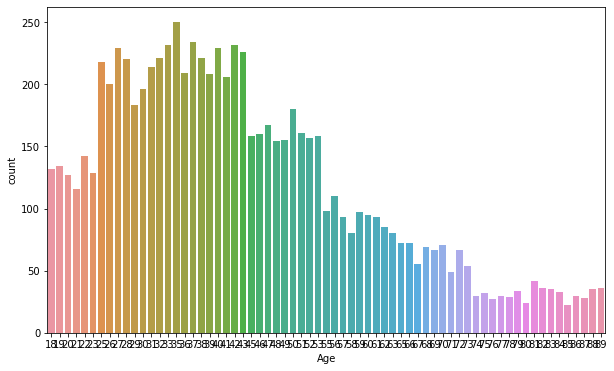

In [197]:
sns.countplot(df.Age)

In [220]:
df[(df.Age > 15) & (df.Age < 20)].shape

(266, 11)